<a href="https://colab.research.google.com/github/harshmudgil97/almabetter-EDA/blob/main/CH_Harsh_Mudgil_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
sns.set(rc={'figure.figsize':(15,10)})

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/EDA Self Project/Hotel Bookings.csv')

In [ ]:
df.head(3)

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02

[3 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Determining distribution channels with high ADR per month

Distribution channels with highest ADR, per month should be the focus of the marketing spend, to attract more customers.

In [5]:
df_a = df.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

In [6]:
df_a

distribution_channel  Corporate      Direct         GDS       TA/TO  Undefined
arrival_date_month                                                            
April                 69.506132   99.523556   96.344444  102.033148        NaN
August                92.665061  161.898404  144.600000  137.520457     29.625
December              52.996086   93.565880   84.150909   80.414481        NaN
February              54.898209   71.510560   94.596316   75.612502        NaN
January               56.391486   63.135985   88.476190   73.682859        NaN
July                  97.303323  146.999842  146.666000  124.672332    112.700
June                  97.024611  126.272123  134.888889  116.734161        NaN
March                 57.040800   76.761017   93.856250   83.280498        NaN
May                   82.942954  109.854567  147.796000  110.024039        NaN
November              55.425356   71.328240  140.210455   76.802338        NaN
October               62.537282   81.577408  120.173200   91.442843        NaN
September             82.755360  118.820688  179.375000  104.870556        NaN

In [7]:
df_a = df_a.fillna(0)

[Text(0, 0.5, 'Average ADR/Month')]

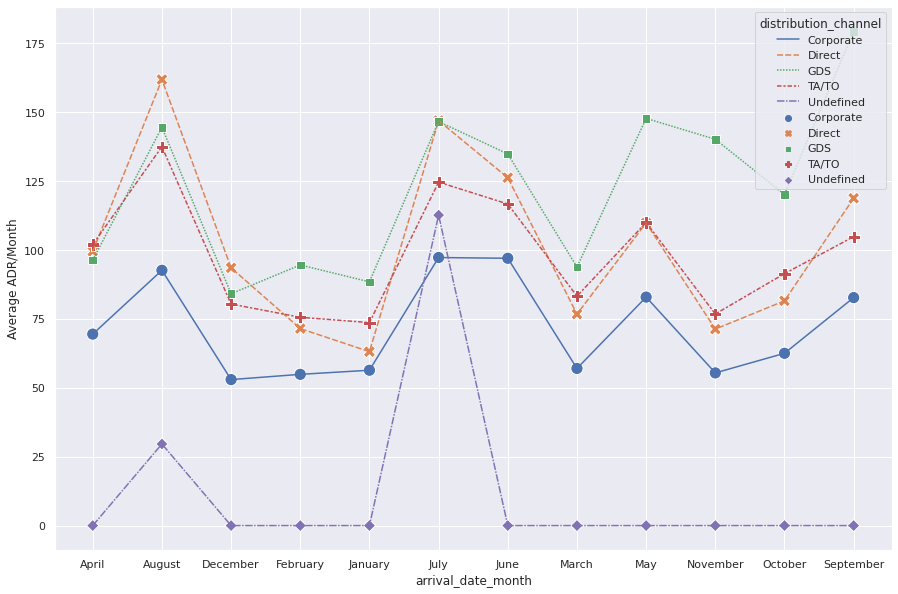

In [38]:
g = sns.scatterplot(data = df_a,s=150)
f = sns.lineplot(data = df_a)
f.set(ylabel='Average ADR/Month')

#Determining Distribution channel attracting most numbers of repeated guests, per month

In [60]:
df_b = df.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

In [61]:
df_b = df_b.fillna(0)

In [62]:
df_b

distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
arrival_date_month                                            
April                     144.0    65.0  1.0   73.0        0.0
August                     51.0    61.0  0.0  111.0        0.0
December                  127.0    89.0  0.0   98.0        0.0
February                  133.0   119.0  0.0  159.0        0.0
January                   164.0   105.0  0.0  128.0        0.0
July                       94.0    61.0  0.0  146.0        0.0
June                      138.0    75.0  0.0   69.0        0.0
March                     175.0   129.0  1.0  121.0        0.0
May                       180.0    72.0  0.0  114.0        0.0
November                  158.0    65.0  1.0   69.0        0.0
October                   112.0    60.0  0.0  141.0        0.0
September                  96.0    36.0  0.0   69.0        0.0

[Text(0, 0.5, 'Number of Repeated Guests')]

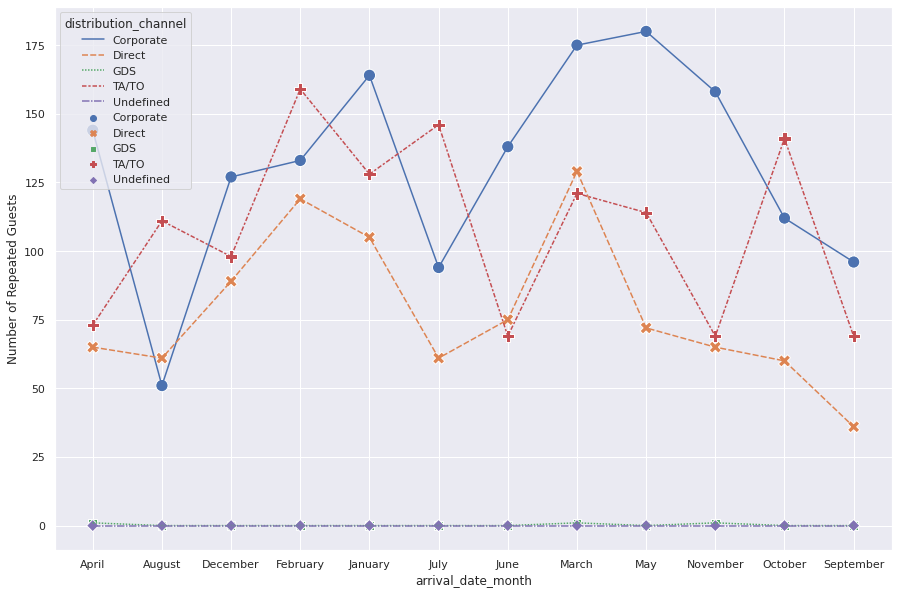

In [66]:
g = sns.scatterplot(data = df_b,s=150)
f = sns.lineplot(data = df_b)
f.set(ylabel='Number of Repeated Guests')


#Determining distribution channels with highest cancellation percentage per month



In [67]:
df_c = df.groupby(['arrival_date_month','distribution_channel']).agg({'is_canceled':['count','sum']})

In [68]:
df_c['cancel_percent'] = (df_c['is_canceled'].loc[:,'sum']/df_c['is_canceled'].loc[:,'count'])*100

In [69]:
df_c.drop('is_canceled',axis=1,inplace=True)

In [70]:
df_c = df_c.unstack().fillna(0)

In [71]:
df_c[['Corporate', 'Direct','GDS','TA/TO','Undefined']] = df_c.cancel_percent.loc[:,:'undefined']

In [72]:
df_c.drop('cancel_percent',axis = 1,inplace=True)

[Text(0, 0.5, 'Cancellation Percentatges')]

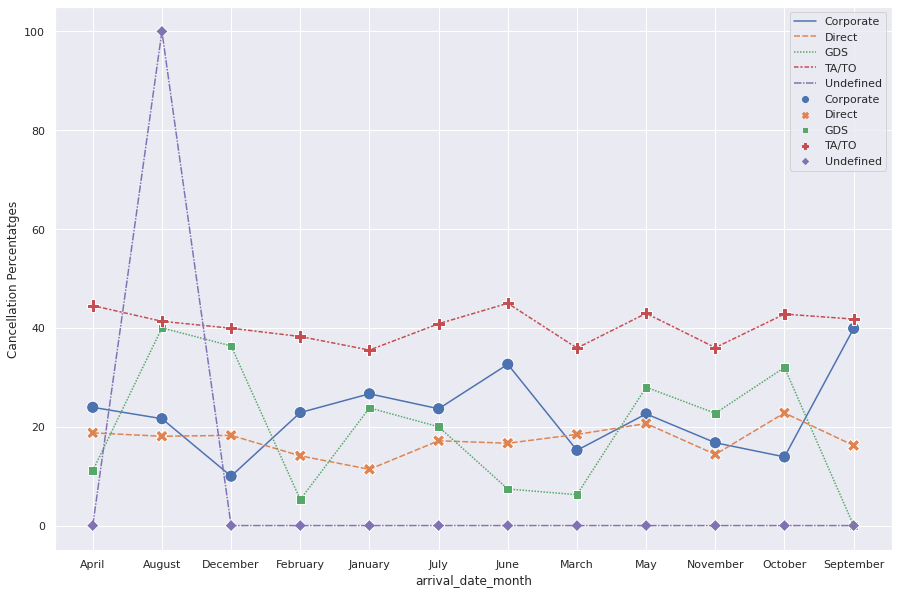

In [74]:
g = sns.scatterplot(data = df_c,s=150)
f = sns.lineplot(data = df_c)
f.set(ylabel='Cancellation Percentatges')

#Determining distribution channels, bringing in customers with most number of special requests, per month.

In [75]:
df_d = df.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

In [76]:
df_d

distribution_channel  Corporate  Direct  GDS   TA/TO  Undefined
arrival_date_month                                             
April                      92.0   618.0  2.0  5071.0        NaN
August                    102.0  1550.0  2.0  8564.0        5.0
December                  111.0   598.0  0.0  3454.0        NaN
February                  103.0   632.0  2.0  3504.0        NaN
January                   117.0   371.0  6.0  2752.0        NaN
July                       98.0  1098.0  0.0  7307.0        2.0
June                      123.0   683.0  2.0  5361.0        NaN
March                     147.0   491.0  0.0  4234.0        NaN
May                       153.0   518.0  8.0  5601.0        NaN
November                  131.0   325.0  8.0  3485.0        NaN
October                   144.0   444.0  8.0  4920.0        NaN
September                  53.0   495.0  0.0  4720.0        NaN

[Text(0, 0.5, 'Number of special requests')]

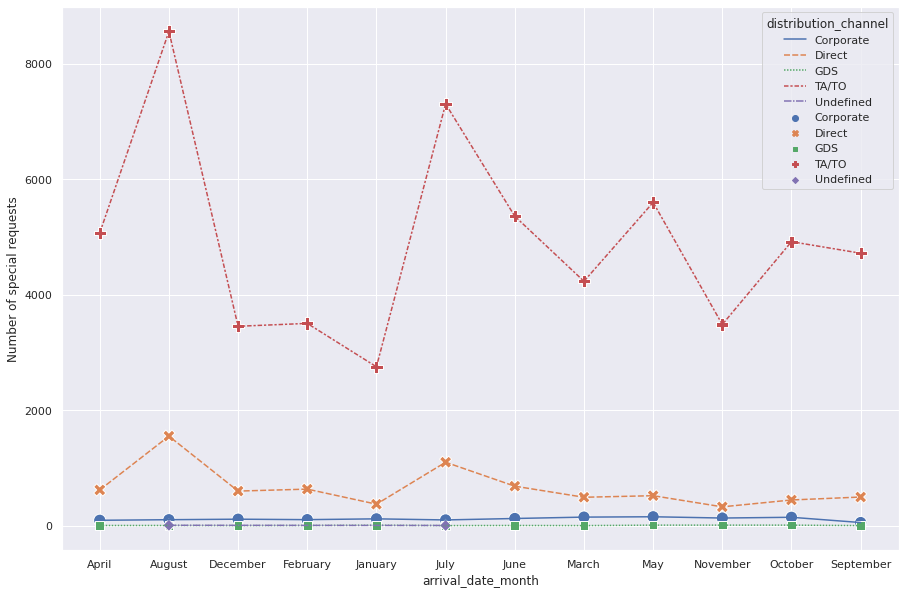

In [77]:
g = sns.scatterplot(data = df_d,s=150)
f = sns.lineplot(data = df_d)
f.set(ylabel='Number of special requests')